# Regression meets Deep Learning
### Boston Housing Price Prediction by Multi-layer NN

![](https://news.bostonrealestate.com/hubfs/Imported_Blog_Media/marketblog.png)   
   
### Process
1. Preprocess Data
2. Scaling Features Data
3. Build and Compile A Model
4. Fit Training and Validation Data to Model
5. Evaluate Model

## 1. Preprocess Data

In [4]:
from keras.datasets import boston_housing
(train_data, train_target), (test_data, test_target) =  boston_housing.load_data()

In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [7]:
train_target.shape

(404,)

## 2. Scaling Features Data

In [13]:
train_data.mean(axis=0)

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [14]:
#  -10から１0にスケール化
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [15]:
print(train_data.min(), train_data.max())

-3.8172503201932715 9.234847178400438


## 3. Build and Compile A Model
- SimpleNNではアーキテクチャが2D（マトリックス）、画像データ自体は（サンプル枚数、行列）の2Dにリシェイプ

In [21]:
from keras.models import Sequential
from keras.layers import Dense

def Multilayer_NN(data):
    model = Sequential()
    model.add(Dense(32, activation="relu", input_shape=(data.shape[1], )))
    model.add(Dense(64, activation="relu",))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [22]:
model = Multilayer_NN(train_data)

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


## 4. Fit Training and Validation Data to Model

In [24]:
NUM_EPOCHS = 5
MINI_BATCH_SIZE = 32

In [26]:
history = model.fit(train_data, train_target, batch_size=MINI_BATCH_SIZE, epochs=NUM_EPOCHS, )

Epoch 1/5
404/404 [==============================] - 1s 1ms/step - loss: 575.0627 - mean_absolute_error: 22.1258
Epoch 2/5
404/404 [==============================] - 0s 170us/step - loss: 522.8774 - mean_absolute_error: 20.9362
Epoch 3/5
404/404 [==============================] - 0s 89us/step - loss: 467.2156 - mean_absolute_error: 19.6104
Epoch 4/5
404/404 [==============================] - 0s 62us/step - loss: 403.5586 - mean_absolute_error: 17.9719
Epoch 5/5
404/404 [==============================] - 0s 75us/step - loss: 334.0895 - mean_absolute_error: 16.1106


In [33]:
history.history

{'loss': [575.0627332630723,
  522.8774411040957,
  467.21560306360226,
  403.55858347675587,
  334.08947179813197],
 'mean_absolute_error': [22.12581409794269,
  20.93619220091565,
  19.61037252445032,
  17.97194766054059,
  16.110599612245466]}

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

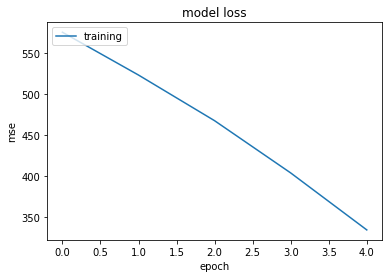

In [31]:
# loss="mse", metrics=["mae"]
# 損失関数
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("mse")
plt.xlabel("epoch")
plt.legend(["training"], loc="upper left")
plt.show()

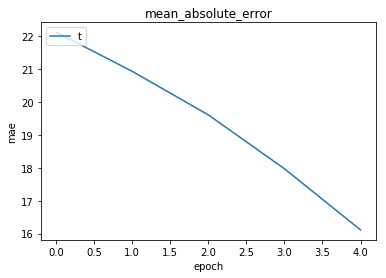

In [35]:
# 評価指数
plt.plot(history.history["mean_absolute_error"])
plt.title("mean_absolute_error")
plt.ylabel("mae")
plt.xlabel("epoch")
plt.legend("training", loc="upper left")
plt.show()

## 5. Evaluate Model

In [36]:
model.evaluate(test_data, test_target)

102/102 [==============================] - 0s 539us/step


[308.97407681334255, 15.485579322366153]

In [40]:
history.history.values()

dict_values([[575.0627332630723, 522.8774411040957, 467.21560306360226, 403.55858347675587, 334.08947179813197], [22.12581409794269, 20.93619220091565, 19.61037252445032, 17.97194766054059, 16.110599612245466]])

# Get a Better Test Result than Training!